In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./large dataset/data.csv")
data.head()

,text,source,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",Bloom-7B,0,967,157
1,Miles feels restless after working all day. He...,Bloom-7B,0,5068,778
2,So first of I am danish. That means that I fol...,Bloom-7B,0,1602,267
3,In this paper we present a novel rule-based ap...,Bloom-7B,0,5469,848
4,"Most social progressives, love democracy, and ...",Bloom-7B,0,2379,380


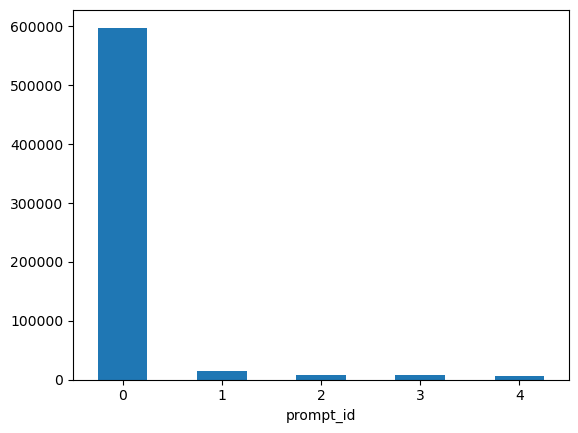

In [8]:
data['prompt_id'].value_counts().sort_values(ascending=False)[:5].plot(
    kind="bar",
)
plt.xticks(rotation=360)
plt.show()